/home/jestin/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
[ERROR:0@0.132] global persistence.cpp:566 open Can't open file: '/home/jestin/.local/lib/python3.10/site-packages/haarcascade_frontalface_default.xml' in read mode
[ERROR:0@0.132] global persistence.cpp:566 open Can't open file: '/home/jestin/.local/lib/python3.10/site-packages/haarcascade_eye.xml' in read mode
[ERROR:0@0.132] global persistence.cpp:566 open Can't open file: '/home/jestin/.local/lib/python3.10/site-packages/haarcascade_mcs_mouth.xml' in read mode
[ERROR:0@0.132] global persistence.cpp:566 open Can't open file: '/home/jestin/.local/lib/python3.10/site-packages/haarcascade_mcs_nose.xml' in read mode
[E

Found 9 .png files in /home/jestin/AMME5710_Major/src/stereo

Processing jestin_3_rgb.png...

Processing jestin_4_rgb.png...

Processing jestin_5_rgb.png...

Processing jestin_7_rgb.png...

Processing jestin_6_rgb.png...

Processing jestin_8_rgb.png...

Processing jestin_2_rgb.png...

Processing jestin_1_rgb.png...

Processing jestin_9_rgb.png...
Error: One or more cascade classifiers failed to load


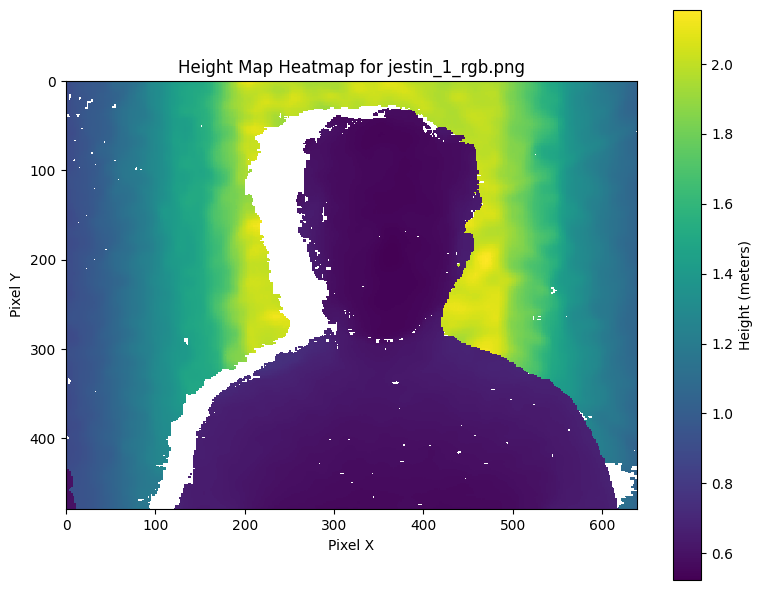

In [1]:
import sys, os
mainpath = os.path.abspath(os.path.dirname(sys.argv[0]))
sys.path.append(mainpath)

import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pickle
import math



heads = {}
i = 0

# folder_path = "AFLW2000-3D/AFLW2000/"
folder_path = os.getcwd()
jpg_files = glob.glob(os.path.join(folder_path, "*.png"))
print(f"Found {len(jpg_files)} .png files in {folder_path}")

for image_path in jpg_files:
    image_name = os.path.basename(image_path)

    pickle_name = image_name[0:-7] + "height.pkl"
    
    try:
        with open(pickle_name, 'rb') as file:
            loaded_data = pickle.load(file)
        # print("Loaded data:", loaded_data)
        # print(loaded_data["height_m"].shape)
        # print(type(loaded_data["height_m"]))
    except FileNotFoundError:
        print(f"Error: The file {pickle_name} was not found.")
    except pickle.PicklingError:
        print("Error: Failed to load the pickle file.")

    image = cv2.imread(os.path.join(folder_path, image_name))
    # print("Image:", image_name, "Shape:", image.shape)
    
    sobel_x = cv2.Sobel(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cv2.CV_64F, 1, 0, ksize=3) # Horizontal
    sobel_y =  cv2.Sobel(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cv2.CV_64F, 0, 1, ksize=3) # Vertical
    
    heads[image_name] = {
        "im_rgb": image,
        "im_bgr": cv2.cvtColor(image, cv2.COLOR_RGB2BGR),
        "im_gray": cv2.cvtColor(image, cv2.COLOR_RGB2GRAY),
        "im_height": loaded_data["height_m"],
        "im_gray_gaussian": cv2.GaussianBlur(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), (5, 5), 0),
        "im_sobel_x": sobel_x,  # Horizontal
        "im_sobel_y": sobel_y,  # Vertical
        "im_sobel_mag": cv2.normalize(np.sqrt(sobel_x**2 + sobel_y**2), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    }
    
    # output_path = f"{image_name[0:-4]}_head_pose.jpg"  # Save annotated image for each
    print(f"\nProcessing {image_name}...")
    # result = GetHeadPose(image_path, output_path)
    # print("Head Pose Euler Angles:", result['angles'])
    # print("Rotation Matrix (Camera to Head Frame):\n", result['camera_to_head_rotation'])
    i = i + 1
    if i >= 20:
        break
    #       # Wait for a key press indefinitely
   
    

face_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_eye.xml'))
mouth_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_mouth.xml'))
nose_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_nose.xml'))
profileface_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_profileface.xml'))
left_ear_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_leftear.xml'))
right_ear_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_rightear.xml'))


# Check if classifiers loaded successfully
classifiers = [face_cascade, eye_cascade, mouth_cascade, nose_cascade, 
              profileface_cascade, left_ear_cascade, right_ear_cascade]
if any(c.empty() for c in classifiers):
    print("Error: One or more cascade classifiers failed to load")

key = "jestin_1_rgb.png"
# display_height_map_as_heatmap(heads[key]["im_height"], key)

nose_height_map = heads[key]["im_height"]

# To display the height map as a heatmap, utilize matplotlib with a suitable colormap.
# The 'viridis' colormap is employed here for clear visualization of depth variations.
# Invalid or missing values (e.g., NaN or inf) are masked to ensure proper rendering.

height_map = nose_height_map  # Alias for clarity

# Mask invalid values if present
mask = np.isnan(height_map) | np.isinf(height_map)
height_map_masked = np.ma.array(height_map, mask=mask)

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(height_map_masked, cmap='viridis', interpolation='nearest')
ax.set_title(f'Height Map Heatmap for {key}')
ax.set_xlabel('Pixel X')
ax.set_ylabel('Pixel Y')
fig.colorbar(im, ax=ax, label='Height (meters)')
plt.tight_layout()
plt.show()